In [1]:
#Reading data
import pandas as pd


#Fixings warnings
import warnings 
warnings.filterwarnings('ignore')


#For mathematical operations
import numpy as np


#Visualisation
import seaborn as sns 
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.figure_factory as ff


#Data spliting
from sklearn.model_selection import train_test_split

In [2]:
sleep_data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep_data.head(10).style.set_properties(**{'background-color': '#4A235A',
                                          'color': '#E2EEF3'})

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.100000,6,42,6,Overweight,126/83,77,4200,Healthy
1,2,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,Healthy
2,3,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,Healthy
3,4,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.900000,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.300000,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.800000,7,75,6,Normal,120/80,70,8000,Healthy
8,9,Male,29,Doctor,7.800000,7,75,6,Normal,120/80,70,8000,Healthy
9,10,Male,29,Doctor,7.800000,7,75,6,Normal,120/80,70,8000,Healthy


In [3]:
shape = colored(sleep_data.shape, "magenta",None, attrs=["blink"])
print('The dimention of data is :',shape)

The dimention of data is : (374, 13)


In [4]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
sleep_data.describe().style.background_gradient(cmap='BuPu') 

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
sleep_data.describe(include='O').style.set_properties(**{'background-color': '#4A235A',
                                                      'color': '#E2EEF3'})  

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,Healthy
freq,189,73,195,99,219


In [7]:
columns_name=colored(sleep_data.columns, 'magenta',None, attrs=["blink"]) #for show names of columns
print(columns_name)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [8]:
number_of_values=colored(sleep_data.nunique(), "magenta",None, attrs=["blink"])
                        
print(number_of_values)

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64


In [9]:
sns.set(style="white")


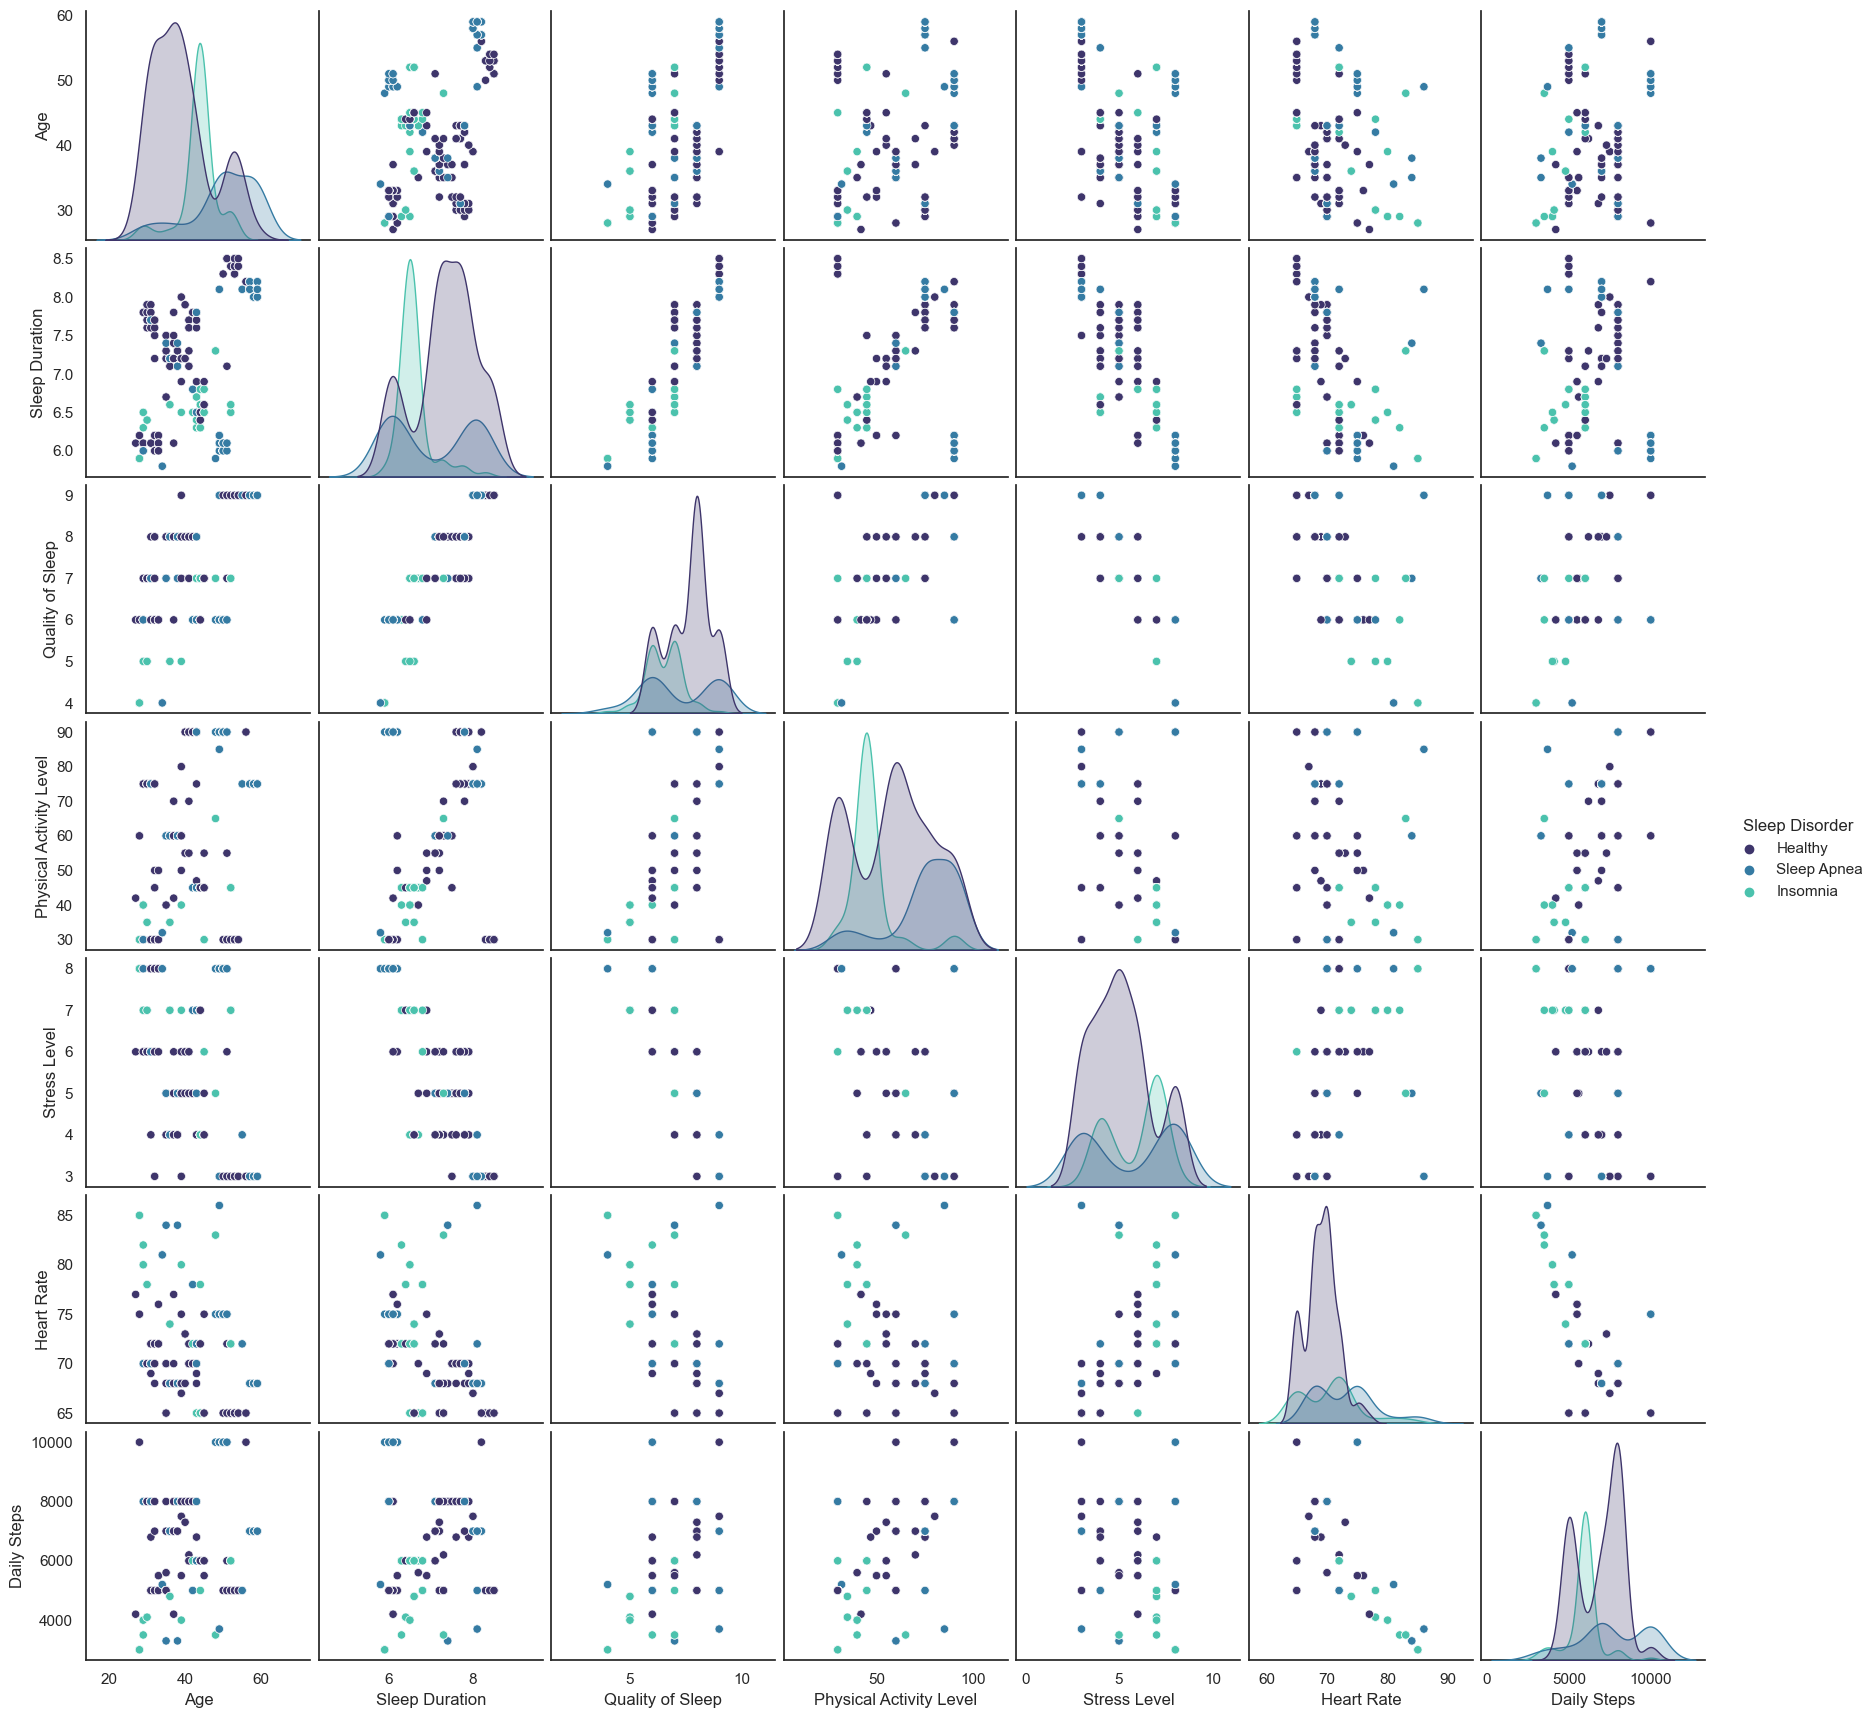

In [10]:
sns.set(style="white")
sns.pairplot(data=sleep_data.drop('Person ID', axis=1), hue='Sleep Disorder', palette='mako')
plt.show()

In [11]:
classes=colored(sleep_data['Sleep Disorder'].unique(), "magenta",None, attrs=["blink"])
print('The outputs from the classification are :',classes)

The outputs from the classification are : ['Healthy' 'Sleep Apnea' 'Insomnia']


In [12]:
sleep_data['Sleep Disorder'].value_counts()

Sleep Disorder
Healthy        219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [15]:
fig=px.histogram(sleep_data,x='Sleep Disorder', 
                 barmode="group",color='Sleep Disorder',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 text_auto=True)
 
    
fig.update_layout(title='<b>Distribution of persons have sleep disorder or not</b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0',
                 showlegend=True)


fig.update_yaxes(showgrid=False)

fig.show()

In [14]:
Gender=colored(sleep_data['Gender'].unique(), "magenta",None, attrs=["blink"])
print('The values of Sex column are :',Gender)

The values of Sex column are : ['Male' 'Female']


In [16]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Healthy         Male      137
                Female     82
Insomnia        Male       41
                Female     36
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

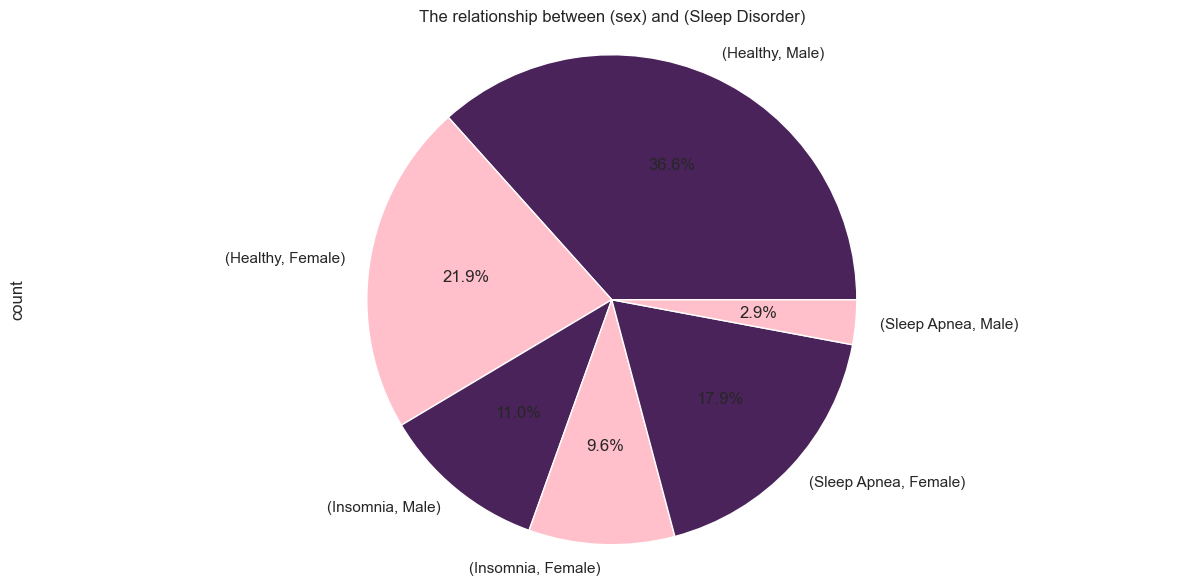

In [17]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7),
                                                                       colors=['#4A235A','pink','#4A235A','pink','#4A235A','pink'])
plt.title('The relationship between (sex) and (Sleep Disorder)')
plt.axis('equal')
plt.show()

In [18]:
jobs=colored(sleep_data['Occupation'].unique(), "magenta",None, attrs=["blink"])
print('The types of jobs that exist are :',jobs)


The types of jobs that exist are : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [19]:
sleep_data.groupby('Sleep Disorder')['Occupation'].value_counts()

Sleep Disorder  Occupation          
Healthy         Doctor                  64
                Engineer                57
                Lawyer                  42
                Accountant              30
                Nurse                    9
                Teacher                  9
                Software Engineer        3
                Scientist                2
                Salesperson              2
                Manager                  1
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                S

In [20]:
fig=px.treemap(sleep_data,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'],
               color='Sleep Disorder',
              color_discrete_sequence=['#EBDEF0','#C39BD3','#4A235A'])


fig.update_layout(title='<b>The effect of job on sleep</b>..',
                 title_font={'size':20})


fig.show()

In [21]:
sleep_data.pivot_table(index='Quality of Sleep',columns='Sleep Disorder',values='Sleep Duration',aggfunc='mean').style.background_gradient(cmap='BuPu')

Sleep Disorder,Healthy,Insomnia,Sleep Apnea
Quality of Sleep,,,
4,nan,5.900000,5.850000
5,nan,6.500000,6.500000
6,6.117500,6.371875,6.118182
7,7.540000,6.638235,7.500000
8,7.399010,7.520000,7.366667
9,8.365789,8.300000,8.096875


In [22]:
fig=px.sunburst(sleep_data,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration',
              color_discrete_sequence=['pink','#4A235A','#FFF3FD'],
              hover_data=['Gender'])

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>..',
                 title_font={'size':25})

fig.show()

In [23]:
fig = px.violin(sleep_data, x="Sleep Disorder",y='Physical Activity Level',
                 color='Sleep Disorder',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 violinmode='overlay')
               
    
fig.update_layout(title='<b>The effect of activities on sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')

fig.update_yaxes(showgrid=False)
fig.show()

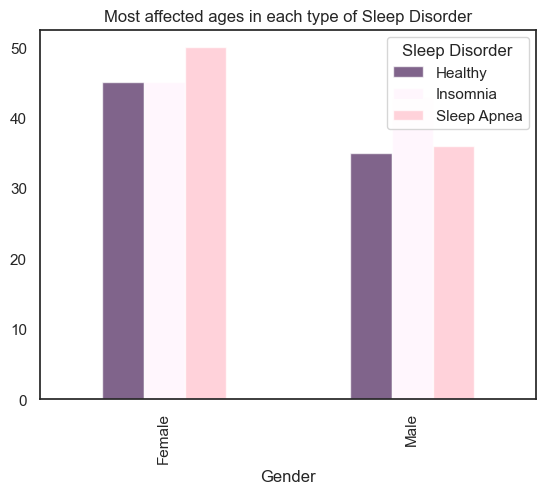

In [24]:
sleep_data.pivot_table(index='Gender',columns='Sleep Disorder',values='Age',aggfunc='median').plot(kind='bar',color={'#FFF3FD','#4A235A','pink'},
                                                                                                   title='Most affected ages in each type of Sleep Disorder',
                                                                                                    label='Age',alpha=.7)


plt.show()

In [25]:
fig=px.ecdf(sleep_data,x='Age',
            color='Sleep Disorder',
            color_discrete_sequence=['white','#4A235A','#C39BD3'])
fig.update_layout(title='<b>The effect of ages on sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [26]:
fig=px.histogram(sleep_data,x='Sleep Disorder',y='Sleep Duration',
                 color='Sleep Disorder',color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 text_auto=True)
fig.update_layout(title='<b>The effect of Sleep Duration on Sleep Disorder</b> ..',
                  titlefont={'size': 24,'family': 'Serif'},
                  showlegend=True, 
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')
fig.update_yaxes(showgrid=False)
fig.show()

In [27]:
fig=px.scatter_3d(sleep_data,x='BMI Category',y='Blood Pressure',z='Heart Rate',
                  color='Sleep Disorder',width=1000,height=900,
                  color_discrete_sequence=['white','#4A235A','#C39BD3'])


fig.update_layout(title='<b>The relationship between (BMI Category , Blood Pressure and Heart Rate) and their effect on  Sleep Disorder</b> ..',
                  titlefont={'size': 20,'family': 'Serif'},
                  showlegend=True)



fig.show()

In [28]:
sleep_data.pivot_table(index='Stress Level',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).style.background_gradient(cmap='BuPu')

In [29]:
fig=px.histogram(sleep_data,x='Sleep Disorder',
                 color='Sleep Disorder',
                 facet_col='Stress Level',
                 barmode='group',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 opacity=.8)


fig.update_layout(title='<b>The effect of Stress Level on Sleep Disorder</b> ..',title_font={'size':30},
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)
fig.show()

In [30]:
BMI_Category=colored(sleep_data['BMI Category'].unique(), "magenta",None, attrs=["blink"])
print('The values of BMI Category column are :',BMI_Category)

The values of BMI Category column are : ['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [31]:
sleep_data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).style.background_gradient(cmap='BuPu')

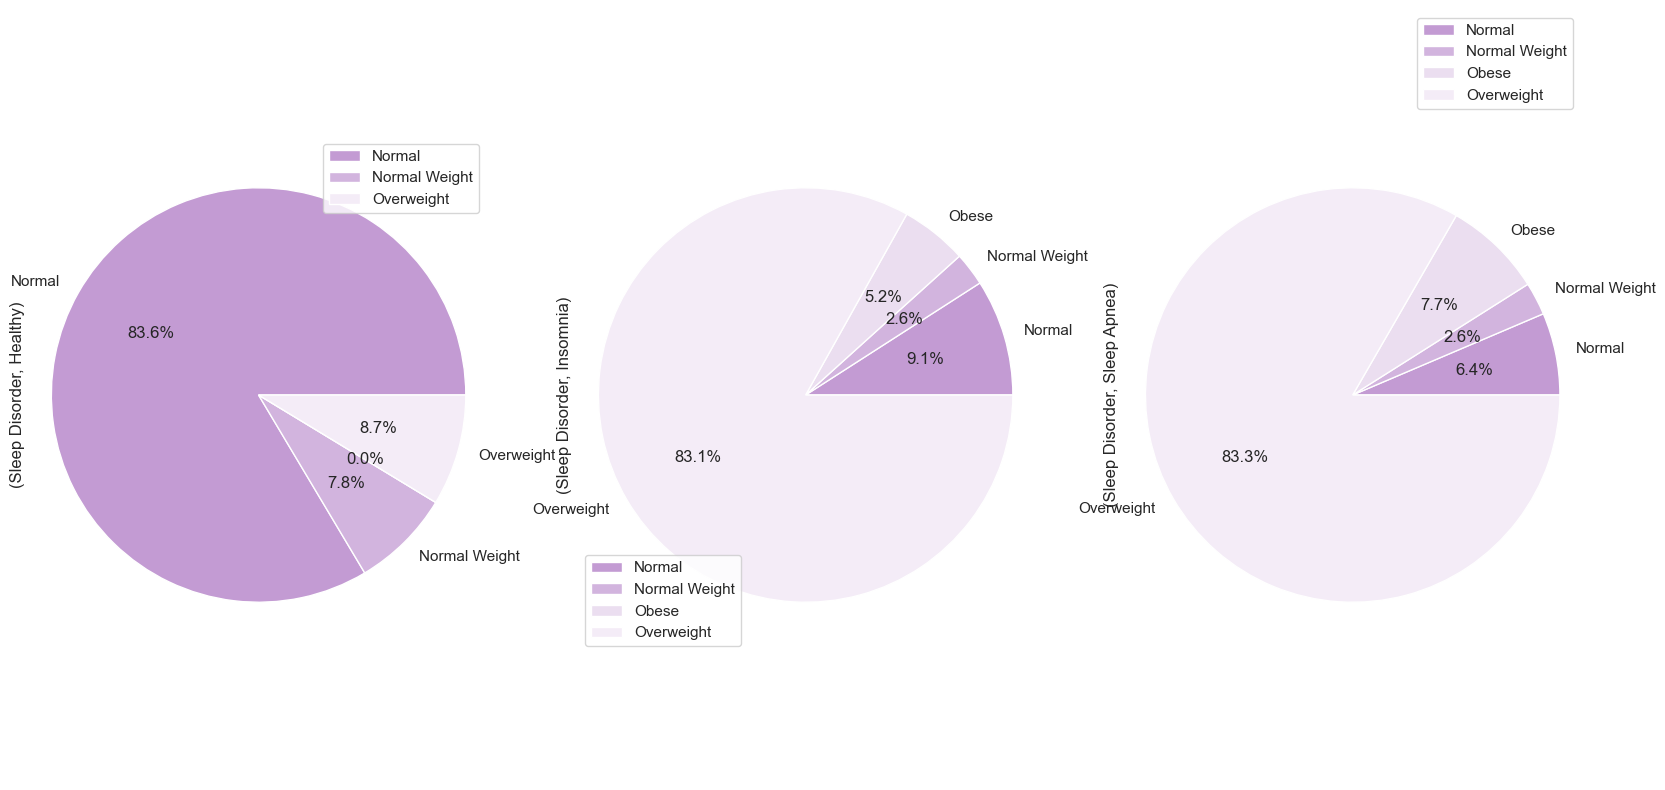

In [32]:
sleep_data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',
                                                                                                                  subplots=True,figsize=(20,10),
                                                                                                                  colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.show()

In [33]:
sleep_data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

<Axes: >

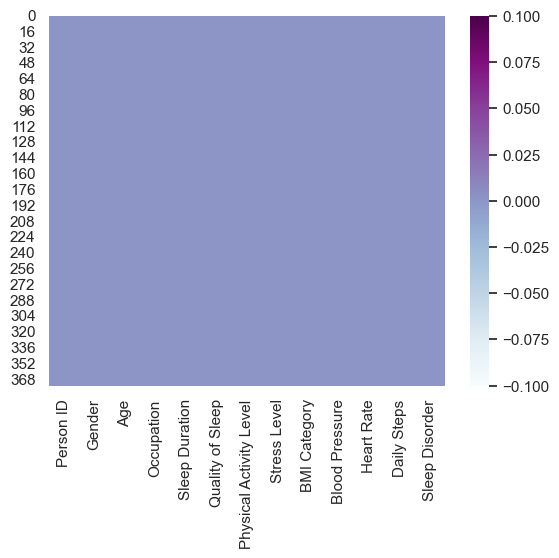

In [34]:
sns.heatmap(sleep_data.isna(),cmap='BuPu')

In [36]:
sleep_data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [37]:
sleep_data['Blood Pressure'].unique()


array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [38]:
sleep_data['Blood Pressure']=sleep_data['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
# 0 = normal blood pressure
# 1 = abnormal blood pressure

In [39]:
sleep_data["Age"]=pd.cut(sleep_data["Age"],2)
sleep_data["Heart Rate"]=pd.cut(sleep_data["Heart Rate"],4)
sleep_data["Daily Steps"]=pd.cut(sleep_data["Daily Steps"],4)
sleep_data["Sleep Duration"]=pd.cut(sleep_data["Sleep Duration"],3)
sleep_data["Physical Activity Level"]=pd.cut(sleep_data["Physical Activity Level"],4)

In [40]:
from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    sleep_data[label]=LE.fit_transform(sleep_data[label])

In [41]:
sleep_data.drop(['Person ID'], axis=1, inplace=True)

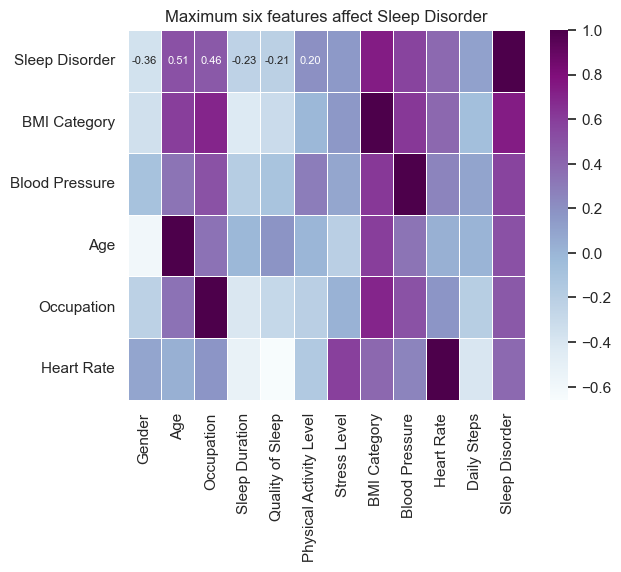

In [42]:
correlation=sleep_data.corr()
max_6_corr=correlation.nlargest(6,"Sleep Disorder")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Maximum six features affect Sleep Disorder')
plt.show()

In [43]:
x=sleep_data.iloc[:,:-1]
y=sleep_data.iloc[:,-1]

x_shape=colored(x.shape, "magenta",None, attrs=["blink"])
y_shape=colored(y.shape, "magenta",None, attrs=["blink"])
print('The dimensions of x is : ',x_shape)
print('The dimensions of y is : ',y_shape)

The dimensions of x is :  (374, 11)
The dimensions of y is :  (374,)


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=32,shuffle=True)

In [45]:
x_train_shape=colored(x_train.shape, "magenta",None, attrs=["blink"])
x_test_shape=colored(x_test.shape, "magenta",None, attrs=["blink"])
y_train_shape=colored(y_train.shape, "magenta",None, attrs=["blink"])
y_test_shape=colored(y_test.shape, "magenta",None, attrs=["blink"])

print("x train dimensions :",x_train_shape)
print("x test dimensions: ",x_test_shape)
print("y train dimensions :",y_train_shape)
print("y test dimensions :",y_test_shape)

x train dimensions : (250, 11)
x test dimensions:  (124, 11)
y train dimensions : (250,)
y test dimensions : (124,)


In [46]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(x_train,y_train)

In [47]:
LR_training_score=colored(round(LR.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
LR_testing_score=colored(round(LR.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print(f"LR training score :",LR_training_score)
print("LR testing score :",LR_testing_score)

LR training score : 90.8
LR testing score : 91.94


In [48]:
LR_y_pred=LR.predict(x_test)

In [50]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 262.6 kB/s eta 0:09:32
   ---------------------------------------- 0.1/150.0 MB 581.0 kB/s eta 0:04:18
   ---------------------------------------- 0.2/150.0 MB 980.4 kB/s eta 0:02:33
   ---------------------------------------- 0.3/150.0 MB 1.2 MB/s eta 0:02:06
   ---------------------------------------- 0.4/150.0 MB 1.3 MB/s eta 0:01:51
   ---------------------------------------- 0.5/150.0 MB 1.4 MB/s eta 0:01:45
   ---------------------------------------- 0.6/150.0 MB 1.6 MB/s eta 0:01:33
   ---------------------------------------- 0.7/150.0 MB 1.7 MB/s eta 0:01:28
   ---------------------------------------- 0.9/150.0 MB 1.8 MB/s eta 0:01:22
   ---------------------------------------- 1.0/150.0 MB 2.0 MB/s eta 0:01:16
 

In [51]:
from xgboost import XGBClassifier
xgb=XGBClassifier().fit(x_train,y_train)

In [52]:
xgb_training_score=colored(round(xgb.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
xgb_testing_score=colored(round(xgb.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("xgb training score :",xgb_training_score)
print("xgb testing score :",xgb_testing_score)

xgb training score : 93.2
xgb testing score : 91.13


In [53]:
xgb_y_pred=xgb.predict(x_test)

In [54]:
!pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB 435.7 kB/s eta 0:03:56
   ---------------------------------------- 0.1/102.5 MB 744.7 kB/s eta 0:02:18
   ---------------------------------------- 0.2/102.5 MB 1.0 MB/s eta 0:01:39
   ---------------------------------------- 0.3/102.5 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 0.3/102.5 MB 1.3 MB/s eta 0:01:21
   ---------------------------------------- 0.4/102.5 MB 1.3 MB/s eta 0:01:21
   ---------------------------------------- 0.5/102.5 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.5/102.5 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 0.6/102.5 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.7/102.5 MB 1.5 MB/s eta 0:01:10
   ---------------------------------------- 0.8/102.5 MB 1.4 MB/s eta 0:01

In [55]:
from catboost import CatBoostClassifier
CBC=CatBoostClassifier(verbose=False).fit(x_train,y_train)

In [56]:
CBC_training_score=colored(round(CBC.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
CBC_testing_score=colored(round(CBC.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("CBC training score :",CBC_training_score)
print("CBC testing score :",CBC_testing_score)

CBC training score : 93.2
CBC testing score : 91.13


In [57]:
CBC_y_pred=CBC.predict(x_test)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(x_train,y_train)

In [59]:
GBC_training_score=colored(round(GBC.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
GBC_testing_score=colored(round(GBC.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("GBC training score :",GBC_training_score)
print("GBC testing score :",GBC_testing_score)

GBC training score : 93.2
GBC testing score : 91.13


In [60]:
GBC_y_pred=GBC.predict(x_test)

In [61]:
from sklearn.svm import SVC
svc = SVC().fit(x_train,y_train)

In [62]:
svc_training_score=colored(round(svc.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
svc_testing_score=colored(round(svc.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("svc training score :",svc_training_score)
print("svc testing score :",svc_testing_score)

svc training score : 88.8
svc testing score : 87.9


In [63]:
svc_y_pred=svc.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix

In [69]:
models_predictions = {
    'Logistic Regression': LR_y_pred,
    'XGBoost': xgb_y_pred,
    'CatBoost': CBC_y_pred,
    'Gradient Boosting': GBC_y_pred,
    'SVM': svc_y_pred
}

labels = ['Healthy', 'Sleep Apnea', 'Insomnia']


In [70]:
for model_name, y_pred in models_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    
    fig = go.Figure(data=go.Heatmap(
        z=cm,
        x=labels,
        y=labels,
        colorscale='BuPu',
        hoverongaps=False,
        showscale=True,
        text=cm,
        texttemplate="%{text}"
    ))

    fig.update_layout(
        title=f"<b>Confusion Matrix - {model_name}</b>",
        xaxis_title="Predicted Label",
        yaxis_title="True Label",
        width=500,
        height=450,
        plot_bgcolor='#F5EEF8',
        paper_bgcolor='#F5EEF8',
        font=dict(size=14)
    )

    fig.show()


In [72]:
from plotly.subplots import make_subplots
n_models = len(models_predictions)
cols = 3
rows = (n_models // cols) + (n_models % cols > 0)

fig = make_subplots(rows=rows, cols=cols,
                    subplot_titles=[f"{name}" for name in models_predictions.keys()],
                    horizontal_spacing=0.1,
                    vertical_spacing=0.1)

i = 0
for model_name, y_pred in models_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    
    row = (i // cols) + 1
    col = (i % cols) + 1
    
    fig.add_trace(
        go.Heatmap(
            z=cm,
            x=labels,
            y=labels,
            colorscale='BuPu',
            showscale=False,
            text=cm,
            texttemplate="%{text}"
        ),
        row=row, col=col
    )
    i += 1

fig.update_layout(
    height=rows*400,
    width=1300,
    title_text="<b>All Model Confusion Matrices</b>",
    font=dict(size=14),
    plot_bgcolor='#F8F8F8',
    paper_bgcolor='#F8F8F8',
    showlegend=False
)

fig.show()


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import plotly.express as px
import pandas as pd

models_predictions = {
    'Logistic Regression': LR_y_pred,
    'XGBoost': xgb_y_pred,
    'CatBoost': CBC_y_pred,
    'Gradient Boosting': GBC_y_pred,
    'SVM': svc_y_pred
}

model_scores = []

for model_name, y_pred in models_predictions.items():
    model_scores.append({
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 2),
        'Precision': round(precision_score(y_test, y_pred, average='macro', zero_division=0), 2),
        'Recall': round(recall_score(y_test, y_pred, average='macro', zero_division=0), 2),
        'F1 Score': round(f1_score(y_test, y_pred, average='macro', zero_division=0), 2)
    })

score_df = pd.DataFrame(model_scores)
print(score_df)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression      0.92       0.92    0.88      0.90
1              XGBoost      0.91       0.88    0.85      0.86
2             CatBoost      0.91       0.88    0.85      0.86
3    Gradient Boosting      0.91       0.88    0.85      0.86
4                  SVM      0.88       0.83    0.83      0.83


In [75]:
score_df_melted = score_df.melt(id_vars='Model', 
                                 var_name='Metric', 
                                 value_name='Score')


In [76]:
fig = px.bar(score_df_melted,
             x='Model', y='Score',
             color='Metric',
             barmode='group',
             text='Score',
             color_discrete_sequence=px.colors.sequential.Purples)

fig.update_layout(
    title='<b>Model Performance Comparison</b>',
    xaxis_title='Model',
    yaxis_title='Score',
    yaxis=dict(range=[0, 1]),
    paper_bgcolor='#F5EEF8',
    plot_bgcolor='#F5EEF8',
    font=dict(size=14),
    bargap=0.2
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()
